In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import  SimpleImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

In [2]:
url = './Melbourne_housing_FULL.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Data Overview

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


<AxesSubplot:>

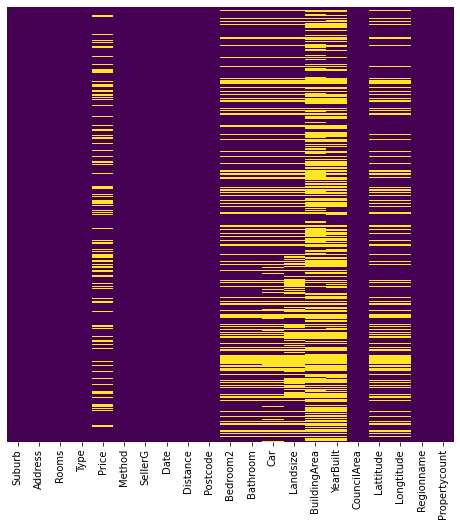

In [5]:
plt.figure(figsize = (8,8)) 
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

## Drop is nan

In [6]:
df = df.dropna(axis=0)

In [7]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


# Xu ly outlier

In [8]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
  
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [10]:
df = df.drop(['Bedroom2'], axis=1)

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = [x.year for x in df['Date']]
df['month'] = [x.month for x in df['Date']]

In [12]:
cols_num = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'year', 'month']

In [13]:
for s in cols_num:
    df[s] = BoxplotOutlierClipper().fit_transform(df[s])

In [14]:
da_Address = df['Address']
da_Address_arr = []
da_Local_arr = []
for s in da_Address:
    if (s.find('/') == -1):
        da_Local_arr.append(0)
    else:
        da_Local_arr.append(1)
    da_Address_arr.append(s.split()[1])
# da_Address_arr
df['city'] = da_Address_arr
df['local'] = da_Local_arr

In [15]:
df = df.drop(['Address'], axis = 1)

In [16]:
df

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year,month,city,local
2,Abbotsford,2.0,h,1035000.0,S,Biggin,2016-04-02,2.50,3067.0,1.0,...,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016,4,Bloomburg,0
4,Abbotsford,3.0,h,1465000.0,SP,Biggin,2017-04-03,2.50,3067.0,2.0,...,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017,4,Charles,0
6,Abbotsford,4.0,h,1600000.0,VB,Nelson,2016-04-06,2.50,3067.0,1.0,...,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,2016,4,Park,0
11,Abbotsford,3.0,h,1876000.0,S,Nelson,2016-07-05,2.50,3067.0,2.0,...,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0,2016,7,Yarra,0
14,Abbotsford,2.0,h,1636000.0,S,Nelson,2016-08-10,2.50,3067.0,1.0,...,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0,2016,8,Charles,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,3.0,h,500000.0,PI,Ray,2018-02-24,25.15,3309.0,2.0,...,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0,2018,2,Birchmore,0
34849,Wollert,3.0,h,570000.0,SP,RW,2018-02-24,25.15,3309.0,2.0,...,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0,2018,2,Kingscote,0
34853,Yarraville,2.0,h,888000.0,SP,Sweeney,2018-02-24,6.30,3013.0,2.0,...,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2018,2,Murray,0
34854,Yarraville,2.0,t,705000.0,S,Jas,2018-02-24,6.30,3013.0,1.0,...,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2018,2,Severn,0


# Feature Scaling

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#output of fit_transform of Label Encoder is already a Numpy Array
df['Suburb'] = le.fit_transform(df['Suburb'])
df['CouncilArea'] = le.fit_transform(df['CouncilArea'])
df['SellerG'] = le.fit_transform(df['SellerG'])
df['city'] = le.fit_transform(df['city'])

In [18]:
df = pd.get_dummies(df, columns=['Type'], prefix='Type')
df = pd.get_dummies(df, columns=['Method'], prefix='Method')
df = pd.get_dummies(df, columns=['Regionname'], prefix='Regionname')

In [19]:
df = df.drop(['Date'], axis=1)

In [20]:
train_x = df.drop(['Price'], axis=1)
train_y = df['Price']

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

new_train_x = scaler_x.fit_transform(train_x)
new_train_y = scaler_y.fit_transform(np.array(train_y).reshape(-1, 1))

In [21]:

x_train, x_valid, y_train, y_valid = train_test_split(new_train_x, new_train_y, test_size=0.2)

rf_model = LinearRegression()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_valid) 

In [22]:
print('MAE: ', metrics.mean_absolute_error(y_valid, y_pred))
print('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('R_Square:', metrics.r2_score(y_valid, y_pred))

MAE:  0.08609255419523684
MSE: 0.0128912903996203
RMSE: 0.11353981856432703
R_Square: 0.778498974720428
